Team Members -

Amal Singh

Manasvi Logani

Saral Agrawal

Yash Mathur

Abhishek Soni

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics
warnings.filterwarnings('ignore')
from tqdm import tqdm
import geopandas as gpd
import scipy.stats as stats
from geopy.geocoders import Nominatim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [122]:
df1=pd.read_csv('/content/drive/MyDrive/python-project/DataCoSupplyChainDataset.csv',encoding='latin1')
df2=pd.read_csv('/content/drive/MyDrive/python-project/final_df.csv',encoding='latin1')

In [123]:
df1

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,S

In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [125]:
df1=df1.drop(columns=['Product Description','Order Zipcode'])

In [92]:
df1['Order Id'].nunique()

65752

In [93]:
df1['Customer Id'].nunique()

20652

Our data has total 20652 customers and 65752 orders.

In [94]:
df1['order date (DateOrders)'] = pd.to_datetime(df1['order date (DateOrders)'])
df1['order year']=df1['order date (DateOrders)'].dt.year
df1['order month']=df1['order date (DateOrders)'].dt.month
df1['order day']=df1['order date (DateOrders)'].dt.day
df1['order time']=df1['order date (DateOrders)'].dt.time
df1['order day']=df1['order date (DateOrders)'].dt.day_name()

In [95]:
df1['shipping date (DateOrders)'] = pd.to_datetime(df1['shipping date (DateOrders)'])
df1['shipping year']=df1['shipping date (DateOrders)'].dt.year
df1['shipping month']=df1['shipping date (DateOrders)'].dt.month
df1['shipping day']=df1['shipping date (DateOrders)'].dt.day
df1['shipping time']=df1['shipping date (DateOrders)'].dt.time
df1['shipping day']=df1['shipping date (DateOrders)'].dt.day_name()

In [96]:
df1['Order Id'].nunique() #Total orders

65752

In [97]:
df1['Customer Id'].nunique() #Total customers

20652

In [98]:
df1['Product Name'].nunique() #Total products

118

Distribution of orders by payment types.

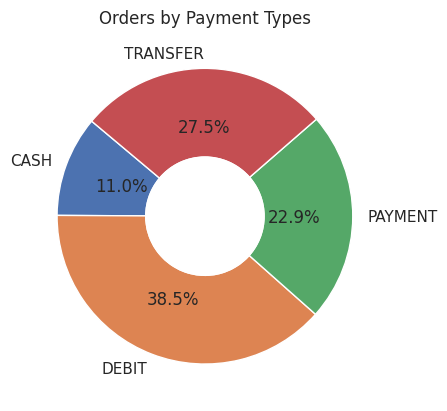

In [99]:
# Group by 'Type' and calculate the unique count of 'Order Id'
type_order_counts = df1.groupby('Type')['Order Id'].nunique()

# Extracting values and labels
labels = type_order_counts.index
sizes = type_order_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.6))
centre_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Orders by Payment Types')
plt.show()

Distribution of orders by delivery status

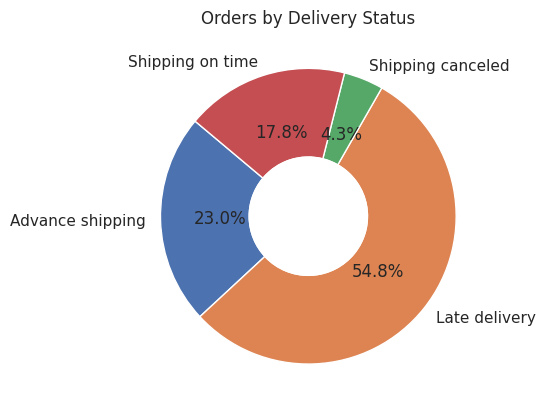

In [100]:
# Group by 'Delivery Status' and calculate the unique count of 'Order Id'
type_order_counts = df1.groupby('Delivery Status')['Order Id'].nunique()

# Extracting values and labels
labels = type_order_counts.index
sizes = type_order_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.6))
centre_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Orders by Delivery Status')
plt.show()

54.8% of the deliveries are late,so will try to analyse why is that and how to reduce that by EDA.

Distribuion of order by department stores.

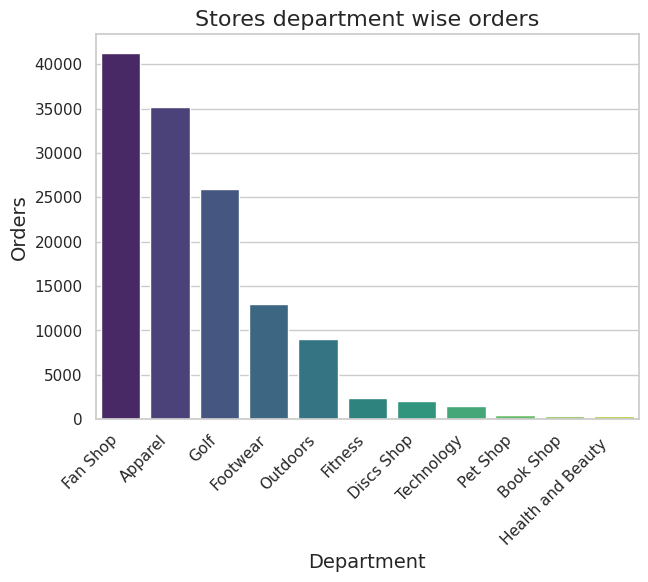

In [101]:
# Group by 'Department Name' and calculate the unique count of 'Order Id'
department_order_counts = df1.groupby('Department Name')['Order Id'].nunique().sort_values(ascending=False).reset_index()

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))
bar_plot = sns.barplot(x='Department Name', y='Order Id', data=department_order_counts, palette='viridis')
plt.xlabel('Department', fontsize=14)
plt.ylabel('Orders', fontsize=14)
plt.title('Stores department wise orders', fontsize=16)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

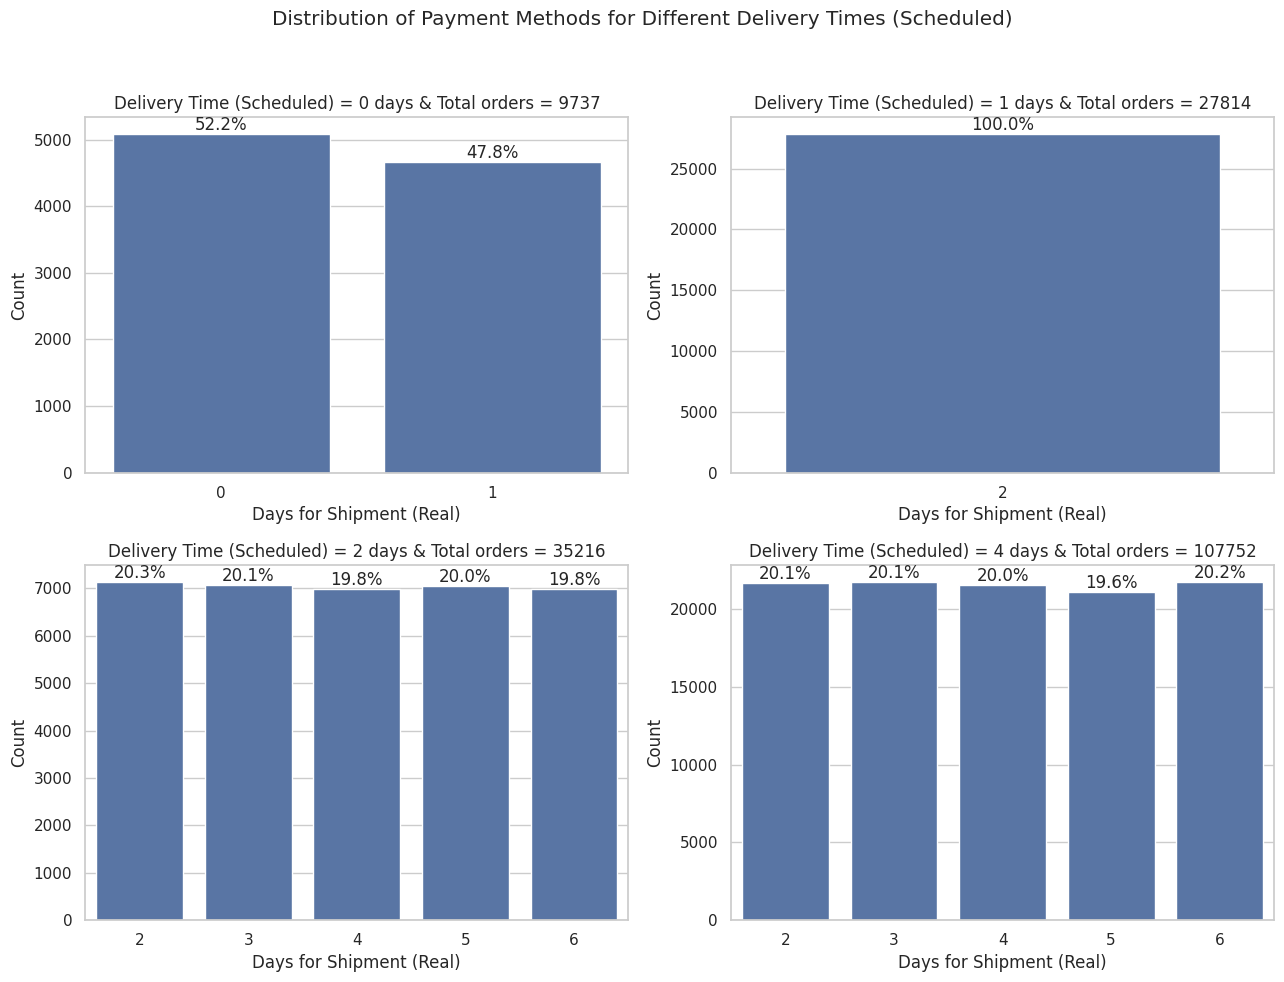

In [102]:
unique_days_scheduled = sorted(df1['Days for shipment (scheduled)'].unique())

num_rows = 2
num_cols = 2

# Set up subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 10))
fig.suptitle('Distribution of Payment Methods for Different Delivery Times (Scheduled)')
axes = axes.flatten()

# Define the order of payment methods for consistent coloring
payment_order = ['DEBIT', 'TRANSFER', 'PAYMENT', 'CASH']
# Loop through different days of delivery (scheduled)
for i, days_scheduled in enumerate(unique_days_scheduled[:4]):  # Take only the first four unique values
    # Filter data for the current days of delivery (scheduled)
    current_data = df1[df1['Days for shipment (scheduled)'] == days_scheduled]
    ax = sns.countplot(x='Days for shipping (real)', data=current_data, ax=axes[i])
    total_orders = current_data.shape[0]
    axes[i].set_title(f'Delivery Time (Scheduled) = {days_scheduled} days & Total orders = {total_orders}')
    axes[i].set_xlabel('Days for Shipment (Real)')
    axes[i].set_ylabel('Count')
    # Annotate percentages inside the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height / total_orders:.1%}', (p.get_x() + p.get_width() / 2., height), ha="center", va="bottom")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

For delivery time (scheduled) - 0, around 50% of the orders are getting delayed

For delivery time (scheduled) - 1, 100% of orders are getting delayed

For delivery time (scheduled) - 2, 80% of the orders are getting delayed

For delivery time (scheduled) - 4, 40% of the orders are getting delayed

Store locations on the world map using geopandas.

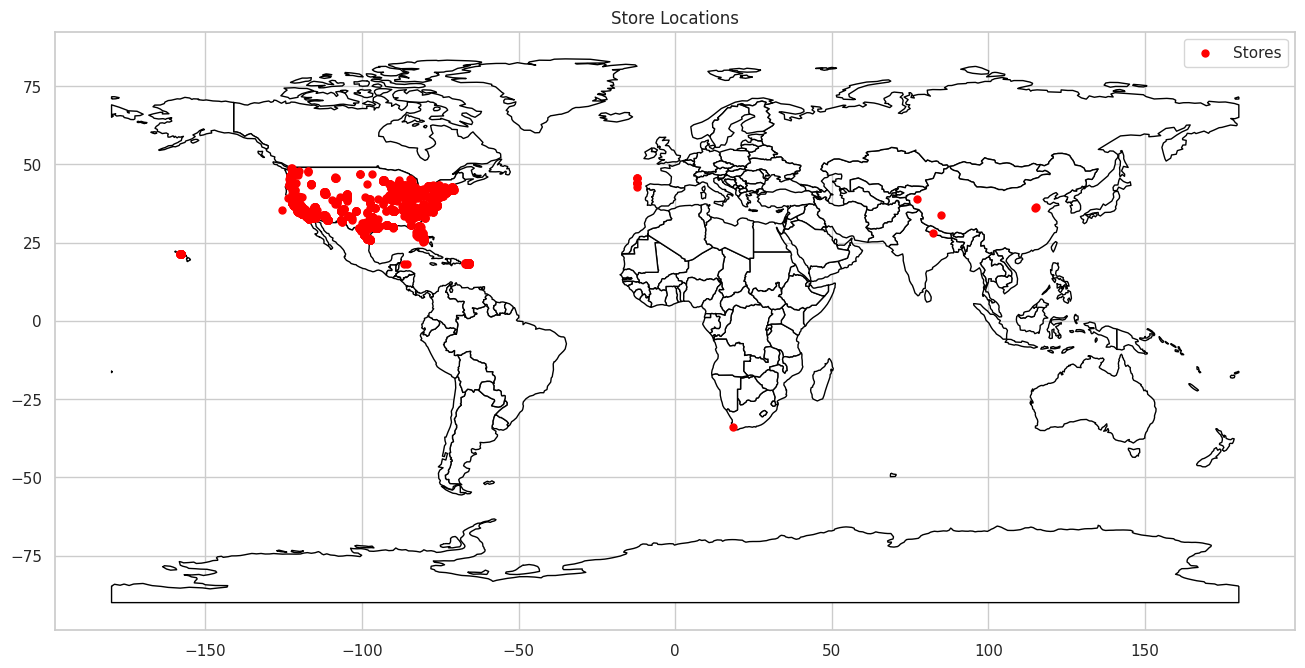

In [103]:
df_stores_location = df1[['Latitude', 'Longitude']].drop_duplicates().dropna()
df_geo = gpd.GeoDataFrame(
    df_stores_location,
    geometry=gpd.points_from_xy(df_stores_location['Longitude'], df_stores_location['Latitude'])
)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(figsize=(16, 8), color='white', edgecolor='black')

df_geo.plot(ax=ax, marker='o', color='red', markersize=25, label='Stores')

plt.title('Store Locations')
plt.legend(loc='upper right')

plt.show()

In [104]:
df_delivery_location = df1[['Order Country', 'Order City']].drop_duplicates().dropna().reset_index(drop=True)
df_delivery_location.head()

,Order Country,Order City
0,Indonesia,Bekasi
1,India,Bikaner
2,Australia,Townsville
3,Australia,Toowoomba
4,China,Guangzhou


In [105]:
%%time
country = 'Indonesia'
city = 'Bekasi'

geolocator = Nominatim(user_agent="city_location")
location = geolocator.geocode(f"{city}, {country}")
print(location.latitude)
print(location.longitude)

-6.2349858
106.9945444
CPU times: user 67.1 ms, sys: 3.85 ms, total: 70.9 ms
Wall time: 611 ms


In [130]:
import geocoder
lat=[]
lon=[]
for i,j in tqdm(df_delivery_location[['Order City','Order Country']].values):

    location = f"{i}, {j}"

    try:
        location_info = geocoder.osm(location)
        if location_info.ok:
            latitude = location_info.latlng[0]
            longitude = location_info.latlng[1]
            lat.append(latitude)
            lon.append(longitude)
        else:
            lat.append(-6.2349858)
            lon.append(106.9945444)

    except Exception as e:
        print(f"Error: {e}")

# Example usage


100%|██████████| 3665/3665 [35:51<00:00,  1.70it/s]


In [131]:
len(df_delivery_location)

3665

In [132]:
df_delivery_location['Delivery Latitude']=lat
df_delivery_location['Delivery Longitude']=lon

In [133]:
df_delivery_location

,Order Country,Order City,Delivery Latitude,Delivery Longitude
0,Indonesia,Bekasi,-6.234986,106.994544
1,India,Bikaner,28.015929,73.317137
2,Australia,Townsville,-19.256939,146.823954
3,Australia,Toowoomba,-27.561019,151.953351
4,China,Guangzhou,23.130196,113.259294
...,...,...,...,...
3660,Uzbekistán,Urganch,41.551790,60.631281
3661,Estados Unidos,Pico Rivera,33.983069,-118.096735
3662,China,Tongling,30.947458,117.805068
3663,China,Liuyang,28.217895,113.700170


In [134]:
df1=df1.merge(df_delivery_location,on=['Order Country','Order City'])

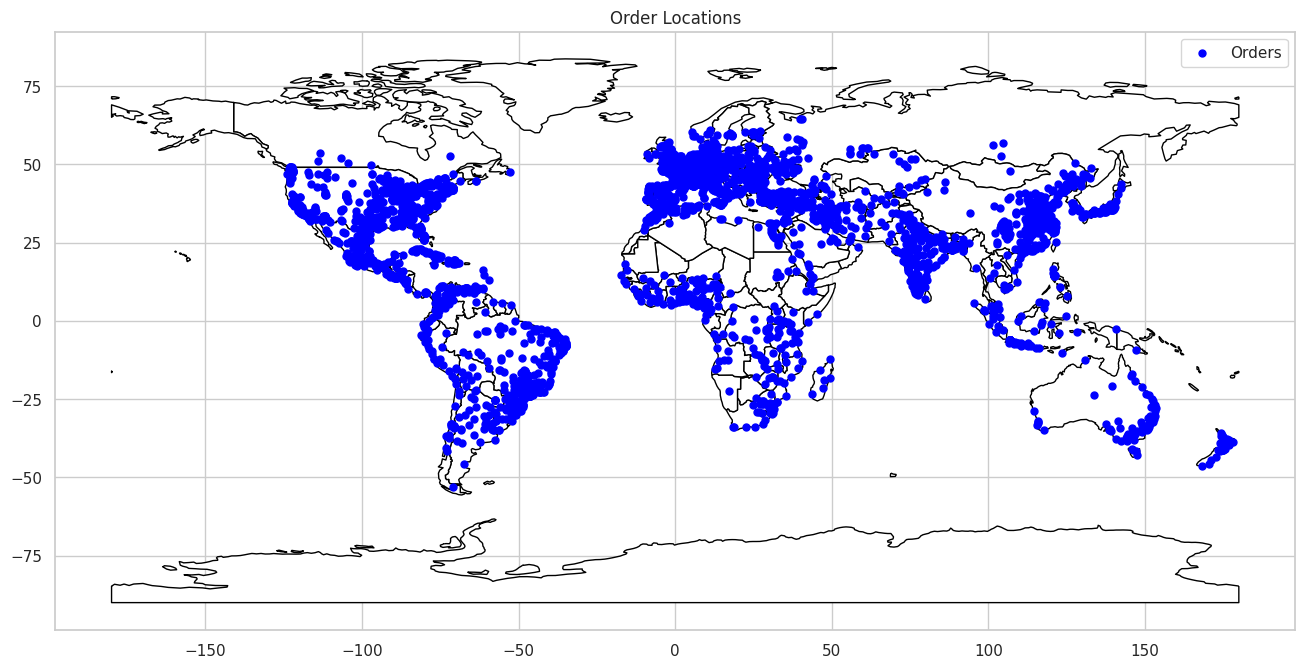

In [135]:
df_geo = gpd.GeoDataFrame(
    df_delivery_location,
    geometry=gpd.points_from_xy(df_delivery_location['Delivery Longitude'], df_delivery_location['Delivery Latitude'])
)

#get the map image
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#plot the world map
ax = world.plot(figsize=(16, 8), color='white', edgecolor='black')

#plot the store locations as dots
df_geo.plot(ax=ax, marker='o', color='blue', markersize=25, label='Orders')

plt.title('Order Locations')
plt.legend(loc='upper right')


plt.show()

In [136]:
from math import radians, cos, sin, asin, sqrt
def haversine_distance(lat1, lon1, lat2, lon2):
    lon1, lon2, lat1, lat2 = map(radians, [lon1, lon2, lat1, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r
df1['Distance'] = df1.apply(lambda row: haversine_distance(row['Latitude'], row['Longitude'],row['Delivery Latitude'], row['Delivery Longitude']), axis=1)
df1[['Latitude', 'Longitude', 'Delivery Latitude', 'Delivery Longitude', 'Distance']]

,Latitude,Longitude,Delivery Latitude,Delivery Longitude,Distance
0,18.251453,-66.037056,-6.234986,106.994544,18480.058856
1,39.363155,-84.391144,-6.234986,106.994544,16158.649552
2,18.254194,-66.370628,-6.234986,106.994544,18497.270245
3,31.651741,-106.267624,-6.234986,106.994544,15552.731732
4,32.760651,-117.016670,-6.234986,106.994544,14599.870098
...,...,...,...,...,...
180514,18.206839,-66.370605,30.947458,117.805068,14531.187079
180515,18.227583,-66.043579,28.217895,113.700170,14850.511689
180516,18.227583,-66.043579,28.217895,113.700170,14850.511689
180517,18.296925,-66.370598,42.765625,-71.467703,2762.886917


In [141]:
df1['Distance'].describe()

count    180519.000000
mean       7337.092775
std        4501.226341
min           0.665082
25%        3338.850774
50%        6946.555455
75%       10159.236561
max       19216.427060
Name: Distance, dtype: float64

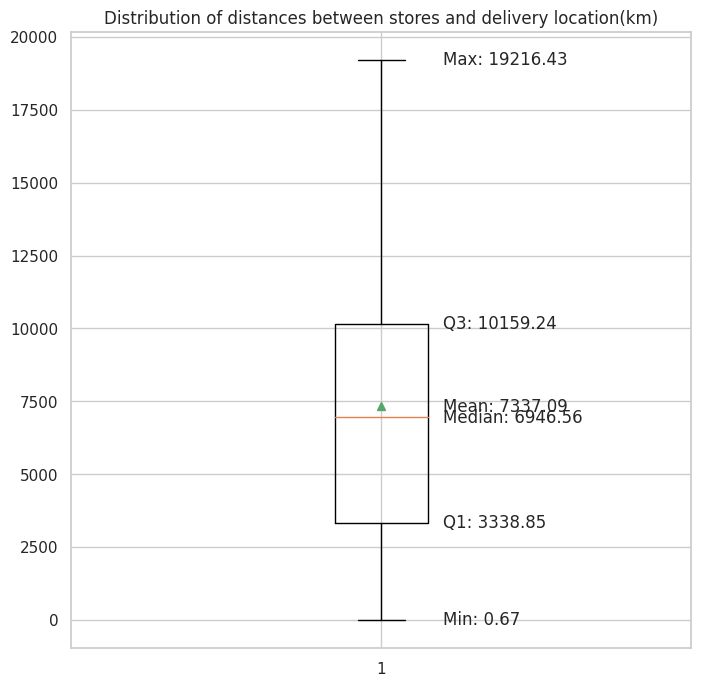

In [143]:
plt.figure(figsize=(8,8))
# Create a horizontal boxplot
plt.boxplot(df1['Distance'], showmeans=True, vert=True)

# Get summary statistics
mean_val = df1['Distance'].mean()
q1 = df1['Distance'].quantile(0.25)
q2 = df1['Distance'].median()
q3 = df1['Distance'].quantile(0.75)
minimum = df1['Distance'].min()
maximum = df1['Distance'].max()

# Annotate the boxplot
plt.text(1.1, mean_val, f'Mean: {mean_val:.2f}', ha='left', va='center')
plt.text(1.1, q1, f'Q1: {q1:.2f}', ha='left', va='center')
plt.text(1.1, q2, f'Median: {q2:.2f}', ha='left', va='center')
plt.text(1.1, q3, f'Q3: {q3:.2f}', ha='left', va='center')
plt.text(1.1, minimum, f'Min: {minimum:.2f}', ha='left', va='center')
plt.text(1.1, maximum, f'Max: {maximum:.2f}', ha='left', va='center')
plt.title('Distribution of distances between stores and delivery location(km)')
# Show the plot
plt.show()


In [144]:
def get_distance(x):
    if x < 3487:
        return "First Quartile"
    elif 3487 <= x < 7240:
        return "Second Quartile"
    elif 7240 <= x < 11129:
        return "Third Quartile"
    else:
        return "Fourth Quartile"

In [146]:
df1['Get_distance']=df1['Distance'].apply(lambda x:get_distance(x))

In [147]:
df1.groupby(['Get_distance']).mean()['Sales']

Get_distance
First Quartile     198.579213
Fourth Quartile    200.535546
Second Quartile    208.450387
Third Quartile     207.382186
Name: Sales, dtype: float64

In [148]:
df1.groupby(['Get_distance']).mean()['Order Item Total']

Get_distance
First Quartile     178.437663
Fourth Quartile    180.105917
Second Quartile    187.354795
Third Quartile     186.390682
Name: Order Item Total, dtype: float64

Distribution of customers and orders by customer segments.

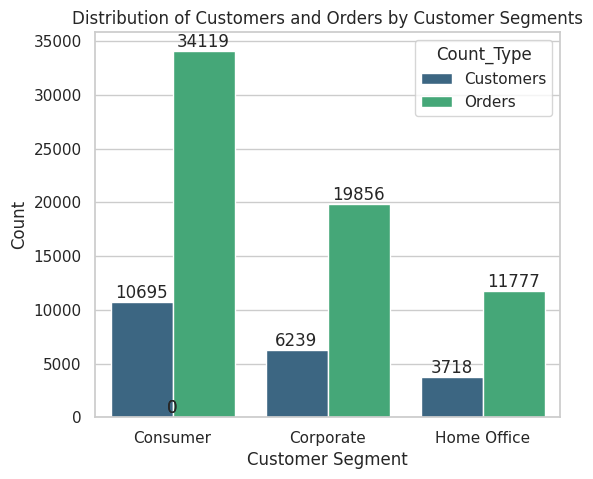

In [137]:
customer_counts = df1.groupby('Customer Segment')['Customer Id'].nunique().reset_index(name='Customers')
order_counts = df1.groupby('Customer Segment')['Order Id'].nunique().reset_index(name='Orders')
merged_counts = pd.merge(customer_counts, order_counts, on='Customer Segment')

# Melt the DataFrame to have a 'Count' column for both 'Customers' and 'Orders'
melted_counts = pd.melt(merged_counts, id_vars='Customer Segment', var_name='Count_Type', value_name='Count')

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.barplot(x='Customer Segment', y='Count', hue='Count_Type', data=melted_counts, palette='viridis')

# Annotate bars with count values
for p in plt.gca().patches:
    count = int(p.get_height())
    plt.gca().annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height()), ha='center', va='bottom')

plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.title('Distribution of Customers and Orders by Customer Segments')
plt.show()

Distribution of delivery status of orders across different customer segments.

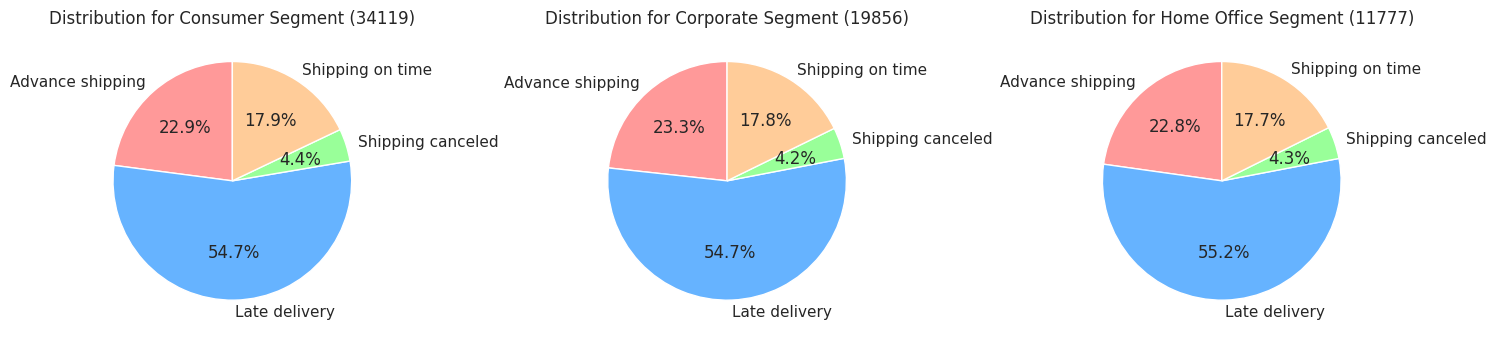

In [138]:
segments = df1['Customer Segment'].unique()

# Set up subplots
fig, axes = plt.subplots(1, len(segments), figsize=(15, 5))

# Plot pie charts for each segment
for i, segment in enumerate(segments):
    segment_data = df1[df1['Customer Segment'] == segment]
    count=segment_data['Order Id'].nunique()
    segment_data.groupby(['Delivery Status'])['Order Id'].nunique().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[i], colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    axes[i].set_title(f'Distribution for {segment} Segment ({count})')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In each customer segment the proportions of delivery status are almost same.

Distribution of orders region wise.

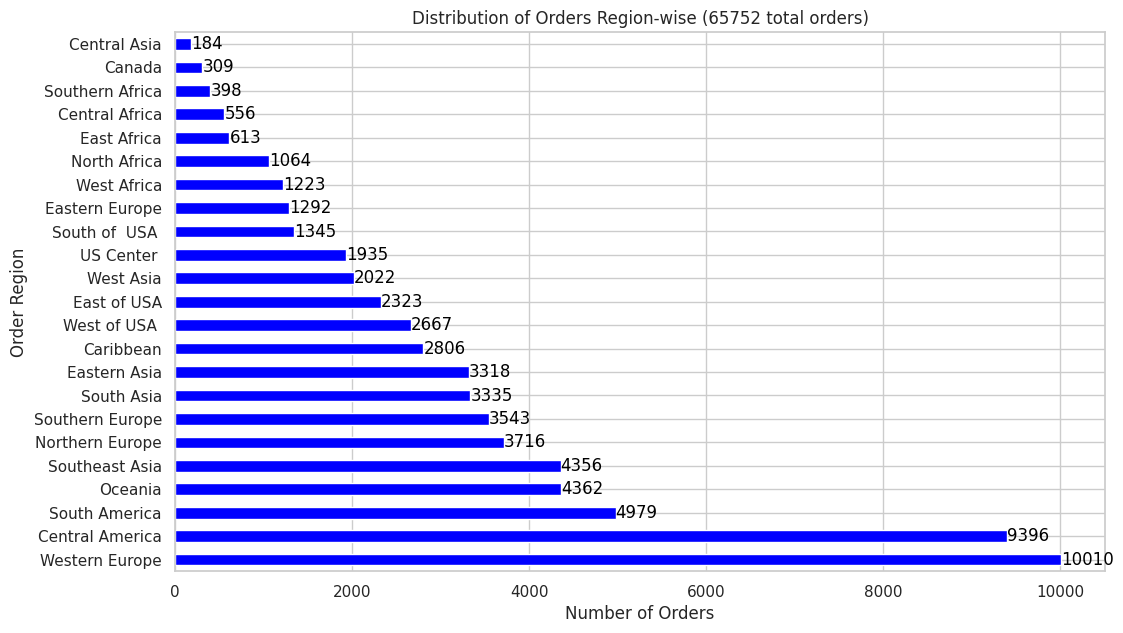

In [139]:
plt.figure(figsize=(12, 7))
total_orders = df1['Order Id'].nunique()
order_region_counts = df1.groupby('Order Region')['Order Id'].nunique().sort_values(ascending=False)
ax = order_region_counts.plot(kind='barh', color='blue')

for i, v in enumerate(order_region_counts):
    ax.text(v + 0.5, i,str(v),color='black', va='center')
plt.title(f'Distribution of Orders Region-wise ({total_orders} total orders)')
plt.xlabel('Number of Orders')
plt.ylabel('Order Region')
plt.show()

Top 3 countries with maximum orders.

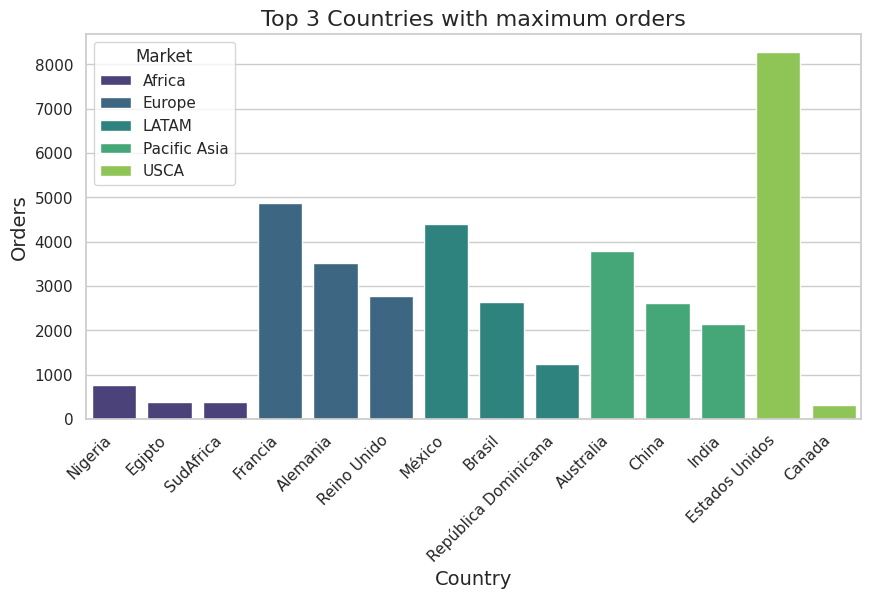

In [140]:
# Group by 'Market' and 'Order Country', then calculate the unique count of 'Order Id'
market_country_order_counts = df1.groupby(['Market', 'Order Country'])['Order Id'].nunique().reset_index()

# Find the top 3 countries with the maximum 'Order Id' counts for each market
top_countries_per_market = market_country_order_counts.groupby('Market').apply(lambda x: x.nlargest(3, 'Order Id')).reset_index(drop=True)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x='Order Country', y='Order Id', hue='Market', data=top_countries_per_market, palette='viridis')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Orders', fontsize=14)
plt.title('Top 3 Countries with maximum orders', fontsize=16)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(title='Market')
plt.show()

Top 3 cities with maximum cities.

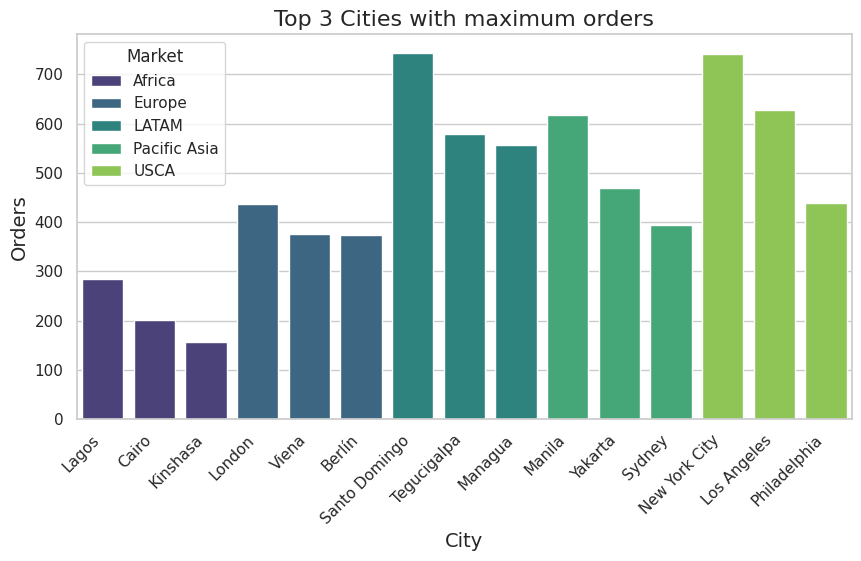

In [ ]:
# Group by 'Market' and 'Order City', then calculate the unique count of 'Order Id'
market_cities_order_counts = df1.groupby(['Market', 'Order City'])['Order Id'].nunique().reset_index()

# Find the top 3 cities with the maximum 'Order Id' counts for each market
top_cities_per_market = market_cities_order_counts.groupby('Market').apply(lambda x: x.nlargest(3, 'Order Id')).reset_index(drop=True)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x='Order City', y='Order Id', hue='Market', data=top_cities_per_market, palette='viridis')
plt.xlabel('City', fontsize=14)
plt.ylabel('Orders', fontsize=14)
plt.title('Top 3 Cities with maximum orders', fontsize=16)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(title='Market')
plt.show()

Distribution of orders by order status.

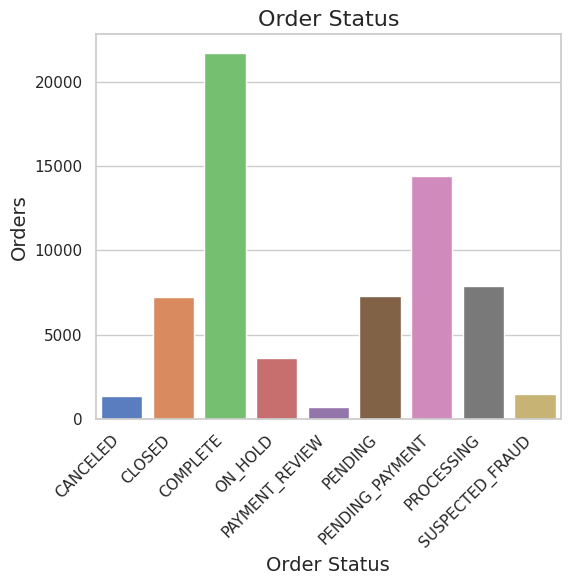

In [ ]:
# Group by 'Order Status' and calculate the unique count of 'Order Id'
order_status_counts = df1.groupby('Order Status')['Order Id'].nunique().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 5))
bar_plot = sns.barplot(x='Order Status', y='Order Id', data=order_status_counts, palette='muted')
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Orders', fontsize=14)
plt.title('Order Status', fontsize=16)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Distribution of orders by delivery countries

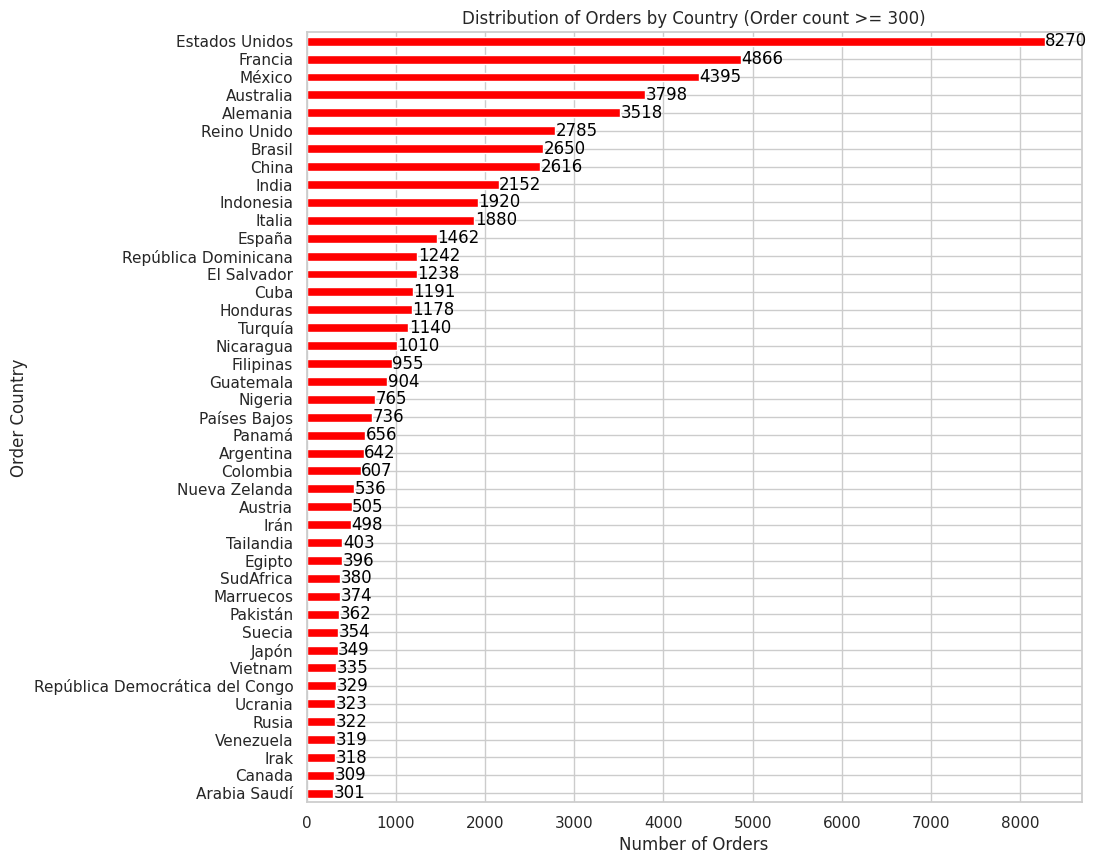

In [ ]:
plt.figure(figsize=(10, 10))
order_country_counts = df1.groupby('Order Country')['Order Id'].nunique().sort_values(ascending=True)

# Filter countries with order count >= 300
filtered_states = order_country_counts[order_country_counts >= 300]
ax = filtered_states.plot(kind='barh', color='red')

# Add annotations with values on bars
for i, v in enumerate(filtered_states):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.title('Distribution of Orders by Country (Order count >= 300)')
plt.xlabel('Number of Orders')
plt.ylabel('Order Country')
plt.show()

Distribution of orders by delivery states

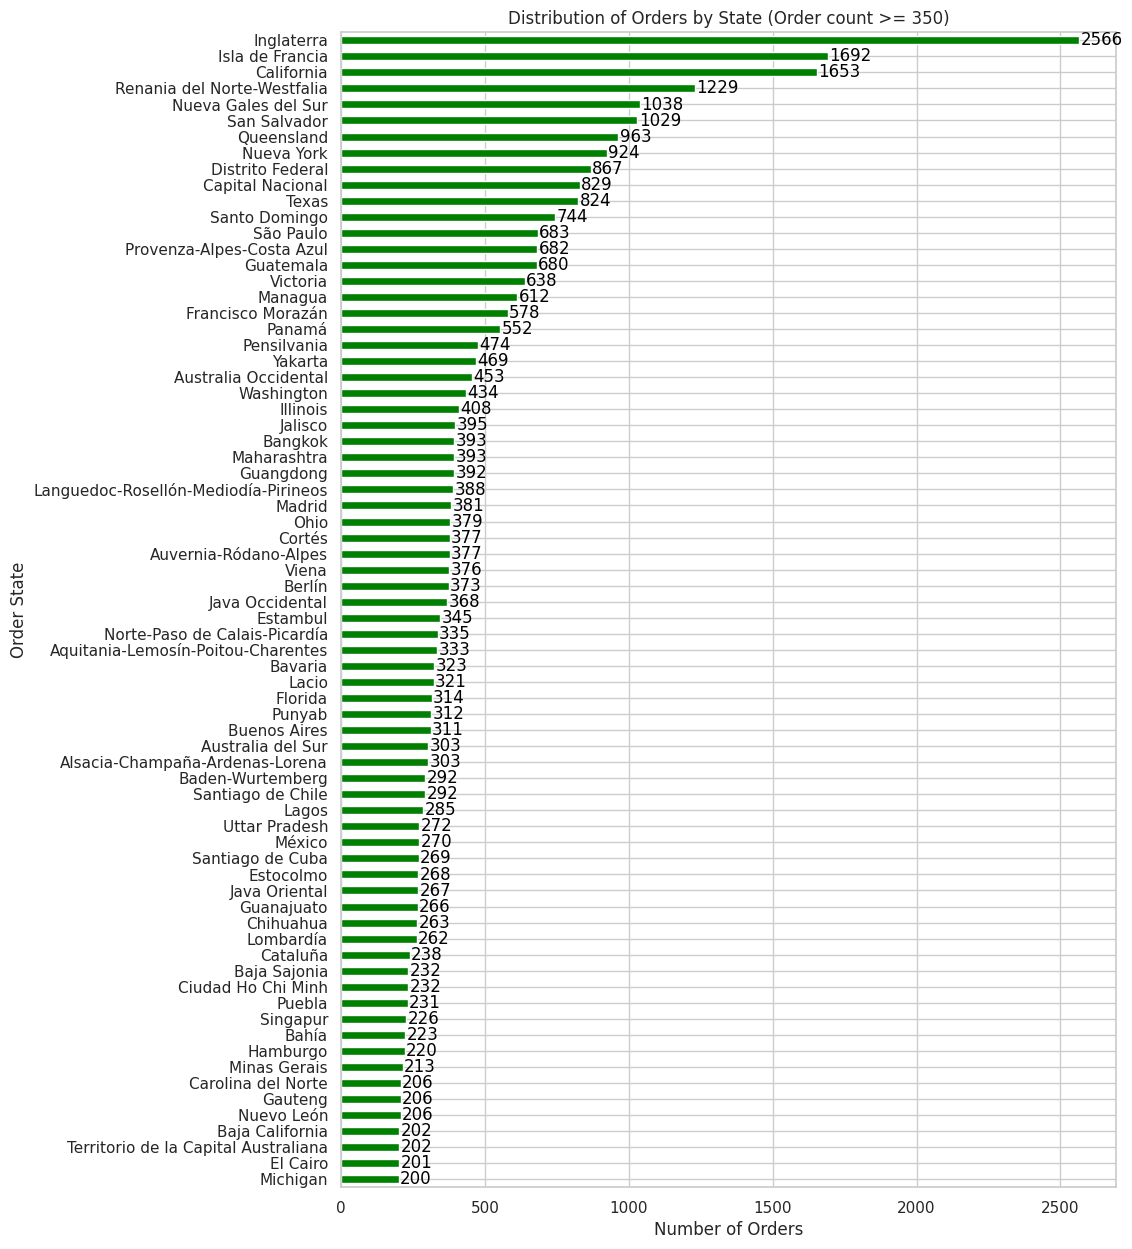

In [ ]:
plt.figure(figsize=(10, 15))
order_state_counts = df1.groupby('Order State')['Order Id'].nunique().sort_values(ascending=True)

# Filter states with order count >= 350
filtered_states = order_state_counts[order_state_counts >= 200]
ax = filtered_states.plot(kind='barh', color='green')

# Add annotations with values on bars
for i, v in enumerate(filtered_states):
    ax.text(v + 5, i, str(v), color='black', va='center')
plt.title('Distribution of Orders by State (Order count >= 350)')
plt.xlabel('Number of Orders')
plt.ylabel('Order State')
plt.show()

Distribution of orders department and product category wise.

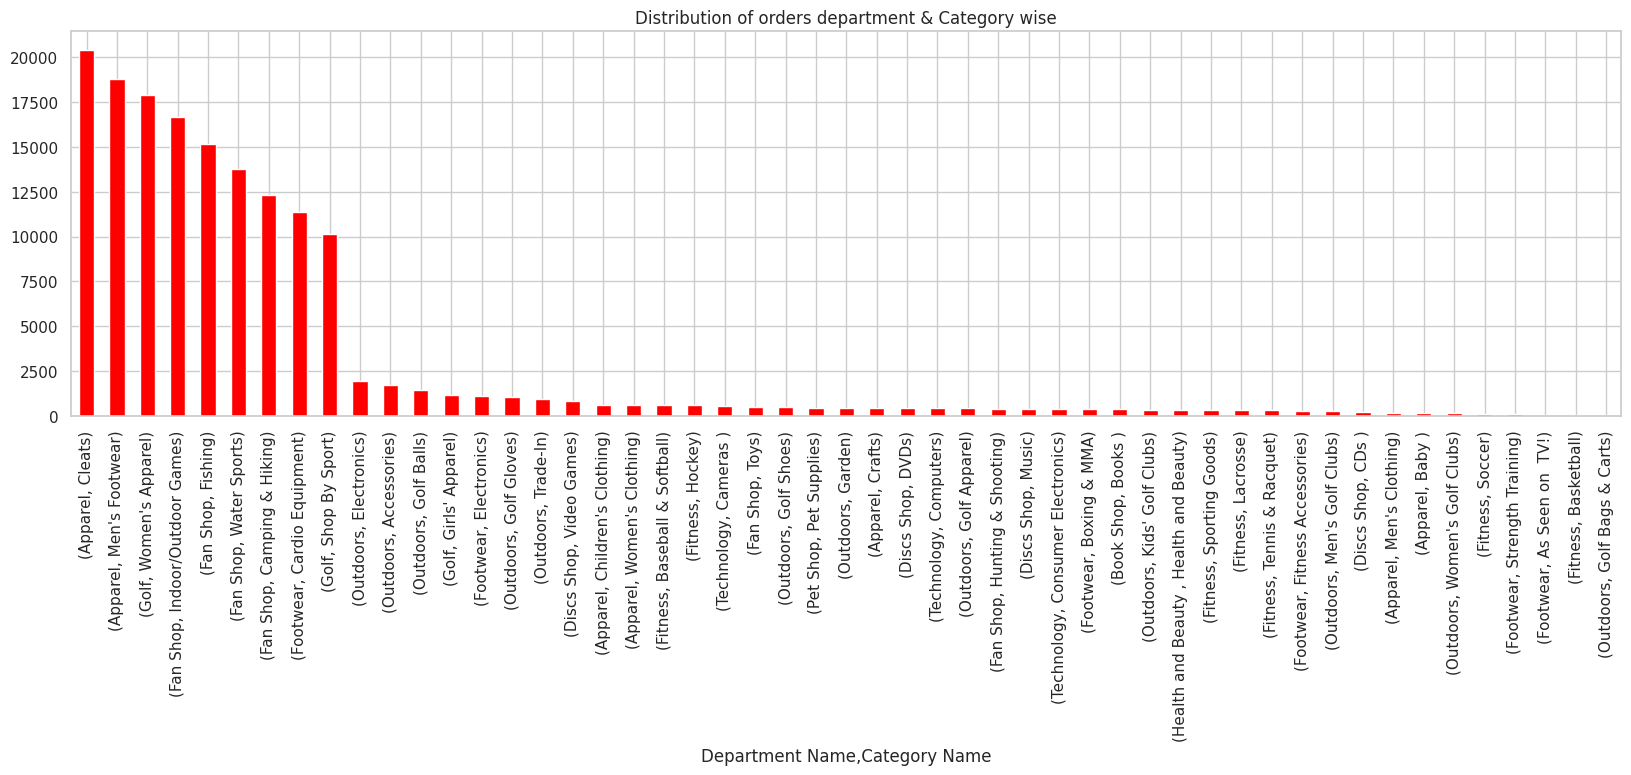

In [ ]:
plt.figure(figsize=(20,5))
df1.groupby(['Department Name','Category Name'])['Order Id'].nunique().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title('Distribution of orders department & Category wise')
plt.show()

Finding the products with the maximum Profit % per order.

In [ ]:
df = df1
# Aggregate the sum of 'Order Item Quantity' for each 'Product Name'
df1 = df.groupby('Product Name')['Order Item Quantity'].sum().reset_index(name='count').sort_values(by='count', ascending=False)

# Compute the mean of 'Benefit per order' and 'Order Item Discount Rate' for each 'Product Name'
df2 = df.groupby('Product Name')[['Benefit per order', 'Order Item Discount Rate']].mean().sort_values(by=['Benefit per order', 'Order Item Discount Rate'], ascending=False)

# Merge the DataFrames df1 and df2 on 'Product Name'
df3 = df1.merge(df2, on='Product Name').sort_values(by='Benefit per order', ascending=False)

# Merge additional information including 'Product Price' and 'Category Name'
df3 = df3.merge(df.groupby('Product Name')['Product Price'].unique().reset_index(), on='Product Name') \
         .merge(df[df['Product Name'].isin(df1.merge(df2, on='Product Name').sort_values(by='Benefit per order', ascending=False)
                  .merge(df.groupby('Product Name')['Product Price'].unique().reset_index(), on='Product Name')['Product Name'])]
                [['Product Name', 'Category Name']].drop_duplicates(), on='Product Name')[['Category Name', 'Product Name', 'Benefit per order', 'Order Item Discount Rate', 'Product Price']]

# Merge df3 with df1 to include the 'count' column representing the total order item quantity for each product
df4 = df3.merge(df1, on='Product Name', how='inner')-

# Calculate 'Profit % per order' as the percentage of 'Benefit per order' relative to 'Product Price'
df4['Profit % per order'] = (df4['Benefit per order'] / df4['Product Price']) * 100

# Sort the DataFrame by 'Profit % per order' in descending order and display the top 10 results
df4.sort_values(by='Profit % per order', ascending=False).head(10)

,Category Name,Product Name,Benefit per order,Order Item Discount Rate,Product Price,count,Profit % per order
4,Kids' Golf Clubs,Polar FT4 Heart Rate Monitor,57.947500,0.077167,[89.98999786],196,[64.3932669255094]
8,Soccer,Elevation Training Mask 2.0,44.588784,0.098649,[79.98999786],231,[55.7429487513563]
10,Golf Gloves,Bag Boy M330 Push Cart,43.030580,0.103623,[79.98999786],208,[53.79495120813335]
7,Hunting & Shooting,The North Face Women's Recon Backpack,49.189473,0.111404,[99.0],181,[49.68633642153111]
67,Golf Gloves,Bag Boy Beverage Holder,11.375556,0.099785,[24.98999977],845,[45.52043092849269]
28,Baseball & Softball,adidas Men's F10 Messi TRX FG Soccer Cleat,26.928098,0.107443,[59.99000168],939,[44.887644123133704]
14,Boxing & MMA,Brooks Women's Ghost 6 Running Shoe,39.497727,0.114697,[89.98999786],212,[43.891241561200225]
89,Golf Balls,Glove It Women's Mod Oval Golf Glove,8.687978,0.106606,[19.98999977],802,[43.46162307074836]
38,Electronics,Titleist Pro V1x High Numbers Personalized Go,21.800948,0.098725,[51.99000168],908,[41.93296190082451]
74,Accessories,Team Golf Pittsburgh Steelers Putter Grip,10.303491,0.108373,[24.98999977],887,[41.23045854471777]


** Sales Actionable Insight**

Here we can see the products like Polar FT4 Heart Rate Monitor, Elevation Training Mask 2.0, Bag Boy M330 Push Cart have quite high profit % per order on an average, so what we could do is to increase the discount rate on these items so as to increase the items sold and it won't affect the profit % much.   

Finding the products with the lowest Profit % per order.

In [ ]:
df4.sort_values(by='Profit % per order',ascending=False).tail(10)

,Category Name,Product Name,Benefit per order,Order Item Discount Rate,Product Price,count,Profit % per order
46,Hockey,Stiga Master Series ST3100 Competition Indoor,17.751112,0.085185,[329.9899902],27,[5.379287927508418]
82,Kids' Golf Clubs,GolfBuddy VT3 GPS Watch,9.644407,0.098814,[199.9900055],59,[4.822444465131458]
81,Men's Clothing,Men's gala suit,9.644423,0.102692,[210.8500061],208,[4.574068129412597]
105,Golf Apparel,Cleveland Golf Women's 588 RTX CB Satin Chrom,5.294429,0.102714,[119.9899979],70,[4.412391656450129]
76,Basketball,Diamondback Girls' Clarity 24 Hybrid Bike 201,10.157857,0.092500,[299.9899902],28,[3.386065396767552]
69,Kids' Golf Clubs,Garmin Forerunner 910XT GPS Watch,11.175143,0.100857,[399.9899902],35,[2.7938555550526227]
93,Strength Training,GoPro HERO3+ Black Edition Camera,7.675939,0.093750,[399.9899902],32,[1.9190327971877945]
115,Basketball,SOLE E25 Elliptical,-16.956000,0.059000,[999.9899902],10,[-1.6956169437864856]
117,Strength Training,SOLE E35 Elliptical,-64.341331,0.120000,[1999.98999],15,[-3.2170826620320567]
116,Kids' Golf Clubs,Bushnell Pro X7 Jolt Slope Rangefinder,-23.268182,0.081818,[599.9899902],11,[-3.8780950425020166]


**Sales Actionable Insight**

Here we can see the products like SOLE E25 Elliptical, SOLE E35 Elliptical, Bushnell Pro X7 Jolt Slope Rangefinder have quite low profit % per order on an average in negative, so these products are going in loss and still the company is giving discounts on these, what we could do is to decrease the discount rate on these items so as to increase the profit % per order.   

Distribution of orders across regions for different years.

In [ ]:
df1['order date (DateOrders)'] = pd.to_datetime(df1['order date (DateOrders)'])
df1['order year']=df1['order date (DateOrders)'].dt.year
df1['order month']=df1['order date (DateOrders)'].dt.month
df1['order day']=df1['order date (DateOrders)'].dt.day
df1['order time']=df1['order date (DateOrders)'].dt.time
df1['order day']=df1['order date (DateOrders)'].dt.day_name()

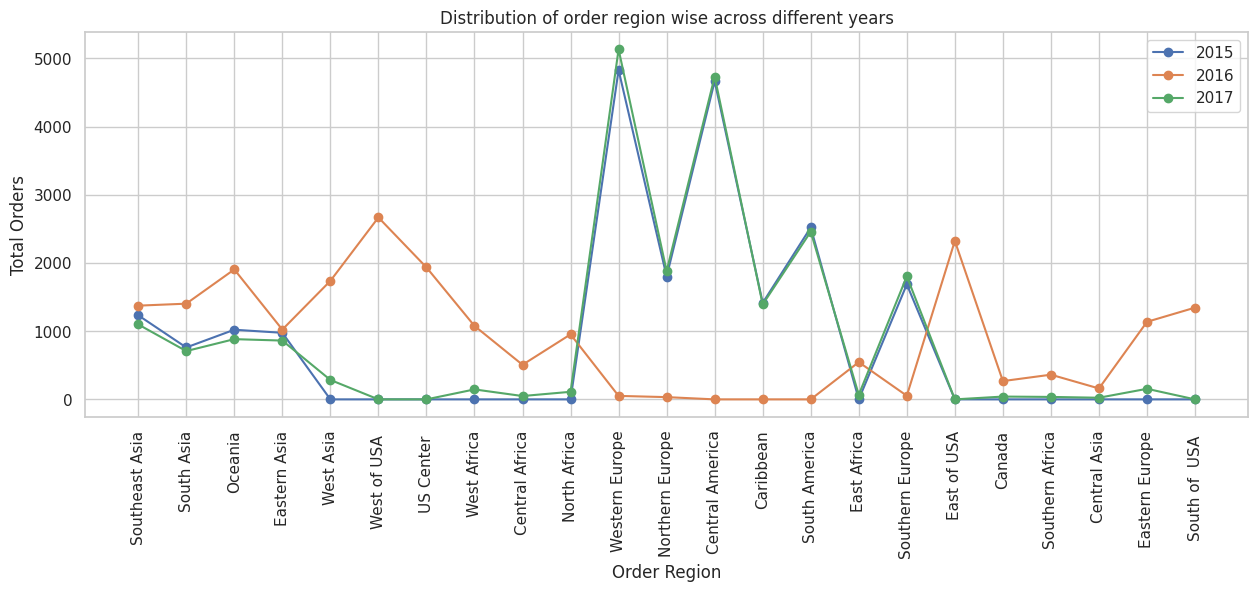

In [ ]:
order_regions = df1['Order Region'].unique().tolist()

# Create lists to store order counts for each year
order_counts_2015 = df1[df1['order year'] == 2015].groupby('Order Region')['Order Id'].nunique().reindex(order_regions, fill_value=0).tolist()
order_counts_2016 = df1[df1['order year'] == 2016].groupby('Order Region')['Order Id'].nunique().reindex(order_regions, fill_value=0).tolist()
order_counts_2017 = df1[df1['order year'] == 2017].groupby('Order Region')['Order Id'].nunique().reindex(order_regions, fill_value=0).tolist()
order_counts_2018 = df1[df1['order year'] == 2018].groupby('Order Region')['Order Id'].nunique().reindex(order_regions, fill_value=0).tolist()
plt.figure(figsize=(15,5))
# Plotting
plt.plot(order_regions, order_counts_2015, label='2015',marker='o')
plt.plot(order_regions, order_counts_2016, label='2016',marker='o')
plt.plot(order_regions, order_counts_2017, label='2017',marker='o')
plt.xticks(rotation=90)
plt.title('Distribution of order region wise across different years')
plt.xlabel('Order Region')
plt.ylabel('Total Orders')
plt.legend()
plt.show()

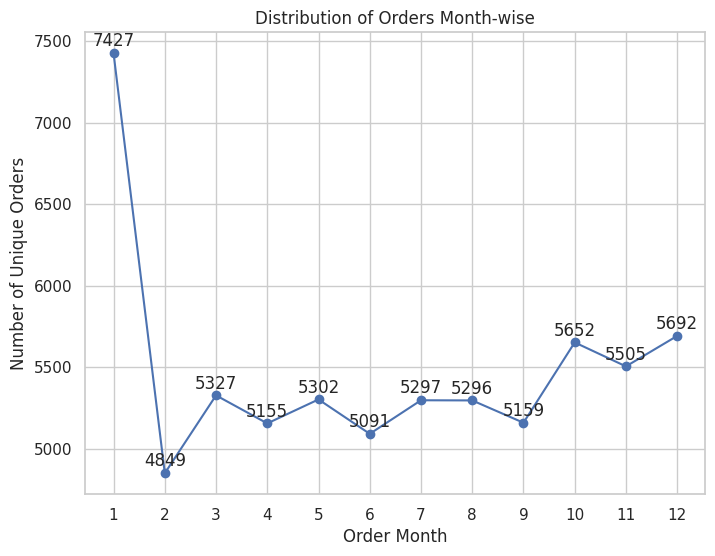

In [ ]:
order_counts = df1.groupby('order month')['Order Id'].nunique()
plt.figure(figsize=(8, 6))
order_counts.plot(marker='o', linestyle='-')
plt.title('Distribution of Orders Month-wise')
plt.xlabel('Order Month')
plt.ylabel('Number of Unique Orders')
for month, count in order_counts.items():
    plt.annotate(f'{count}', (month, count), textcoords="offset points", xytext=(0, 5), ha='center')
plt.xticks([i for i in range(1,13)])
plt.show()

In January the numbers are a little inflated because in 2018 only January data is available.

Insight- It can be deduced from this data that there is an average increase in the number of unique orders around the time of New Year. While the average number of Unique Orders from Feb-September is around 5185.
The average number of Unique Orders from October to Jan is 6069.
i.e. 17.04% increase in the orders.

Distribution of orders across customer segments month wise

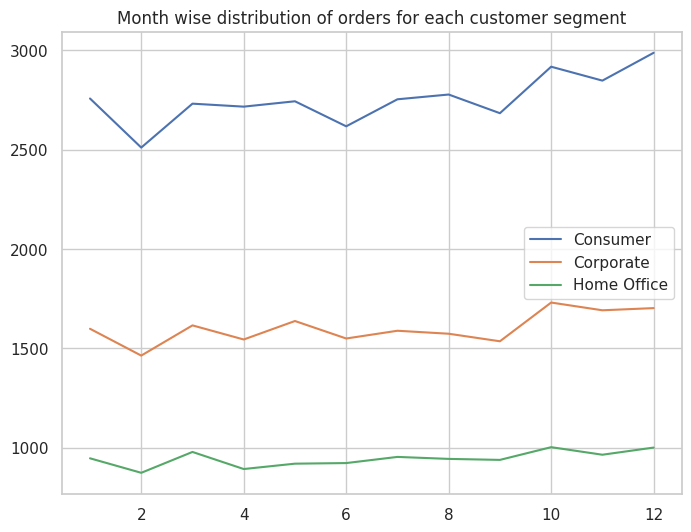

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df1[df1['order year']!=2018].groupby(['Customer Segment','order month'])['Order Id'].nunique().reset_index(name='count')[df1[df1['order year']!=2018].groupby(['Customer Segment','order month'])['Order Id'].nunique().reset_index(name='count')['Customer Segment']=='Consumer']['order month'],df1[df1['order year']!=2018].groupby(['Customer Segment','order month'])['Order Id'].nunique().reset_index(name='count')[df1[df1['order year']!=2018].groupby(['Customer Segment','order month'])['Order Id'].nunique().reset_index(name='count')['Customer Segment']=='Consumer']['count'],label='Consumer')
plt.plot(df1[df1['order year']!=2018].groupby(['Customer Segment','order month'])['Order Id'].nunique().reset_index(name='count')[df1[df1['order year']!=2018].groupby(['Customer Segment','order month'])['Order Id'].nunique().reset_index(name='count')['Customer Segment']=='Consumer']['order month'],df1[df1['order year']!=2018].groupby(['Customer Segment','order month'])['Order Id'].nunique().reset_index(name='count')[df1[df1['order year']!=2018].groupby(['Customer Segment','order month'])['Order Id'].nunique().reset_index(name='count')['Customer Segment']=='Corporate']['count'],label='Corporate')
plt.plot(df1[df1['order year']!=2018].groupby(['Customer Segment','order month'])['Order Id'].nunique().reset_index(name='count')[df1[df1['order year']!=2018].groupby(['Customer Segment','order month'])['Order Id'].nunique().reset_index(name='count')['Customer Segment']=='Consumer']['order month'],df1[df1['order year']!=2018].groupby(['Customer Segment','order month'])['Order Id'].nunique().reset_index(name='count')[df[df['order year']!=2018].groupby(['Customer Segment','order month'])['Order Id'].nunique().reset_index(name='count')['Customer Segment']=='Home Office']['count'],label='Home Office')
plt.legend()
plt.title('Month wise distribution of orders for each customer segment')
plt.show()

Insight- In Consumer and corporate segment we can see that there is a increase in number of orders in 10th month. This could be beacause of

Holiday Season: Many regions celebrate holidays and festivals during this period, leading to an increase in gift shopping and overall consumer spending.

Year-End Sales: Retailers often offer promotions, discounts, and sales events to clear inventory before the end of the year, attracting more customers

Top 3 most selling categories in each region

In [ ]:
region_category_counts = df1.groupby(['Order Region', 'Category Name'])['Order Id'].nunique().reset_index(name='Count')

# Sort the counts within each 'Order Region' group
region_category_counts['Rank'] = region_category_counts.groupby('Order Region')['Count'].rank(ascending=False, method='dense')

# Filter for the top 3 categories in each 'Order Region'
top_3_categories = region_category_counts[region_category_counts['Rank'] <= 3]

top_3_categories.iloc[:,:3]

,Order Region,Category Name,Count
5,Canada,Cleats,122
18,Canada,Men's Footwear,105
23,Canada,Women's Apparel,100
30,Caribbean,Cleats,1000
45,Caribbean,Men's Footwear,884
...,...,...,...
644,West of USA,Men's Footwear,891
649,West of USA,Women's Apparel,818
662,Western Europe,Cleats,3086
681,Western Europe,Men's Footwear,2739


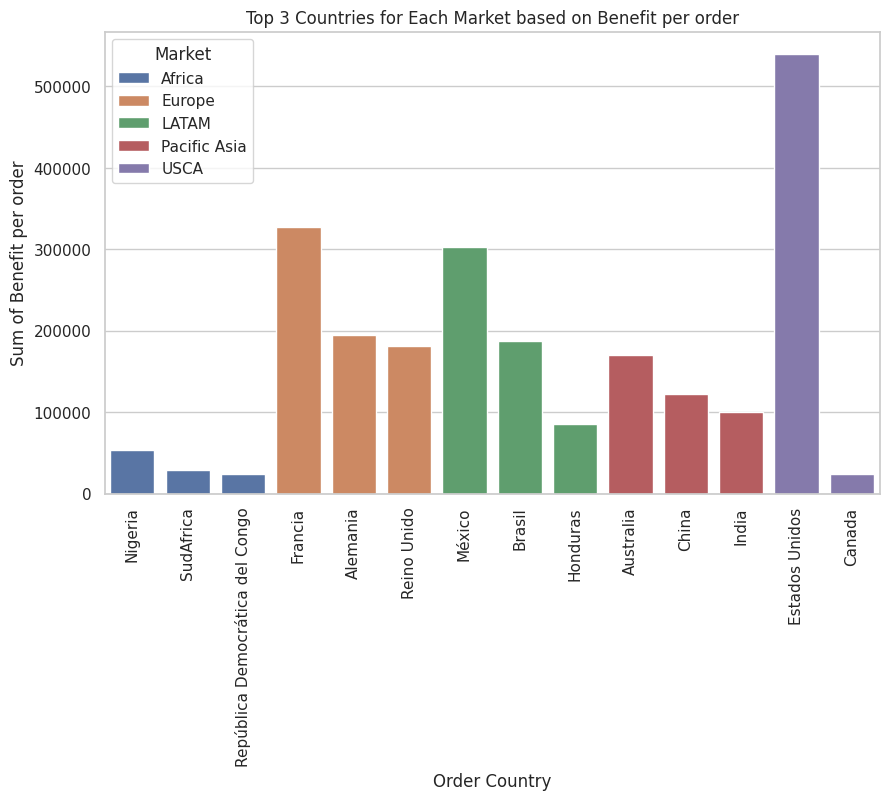

In [ ]:
grouped_df = df1.groupby(['Market', 'Order Country']).sum()['Benefit per order']
top_countries = grouped_df.groupby('Market', group_keys=False).nlargest(3)
top_countries = top_countries.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Country', y='Benefit per order', hue='Market', data=top_countries)
plt.title('Top 3 Countries for Each Market based on Benefit per order')
plt.xlabel('Order Country')
plt.ylabel('Sum of Benefit per order')
plt.legend(title='Market', title_fontsize='12')
plt.xticks(rotation=90)
plt.show()


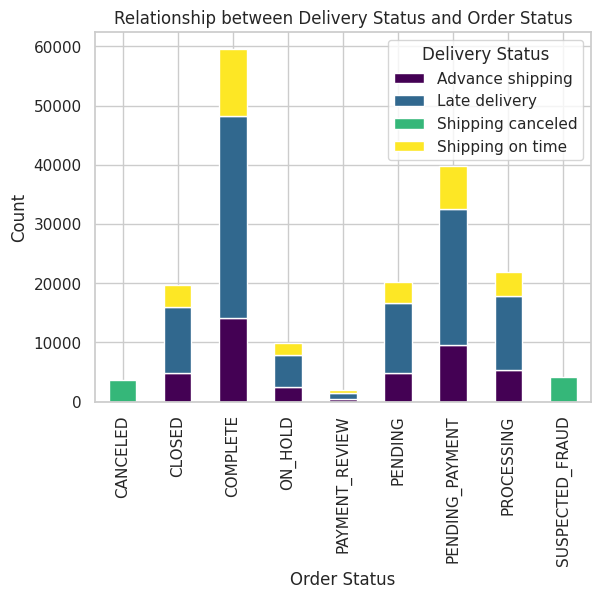

In [77]:
# Create a contingency table
contingency_table = pd.crosstab(df1['Order Status'], df1['Delivery Status'])

# Plot the stacked bar chart
sns.set(style="whitegrid")
contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Relationship between Delivery Status and Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

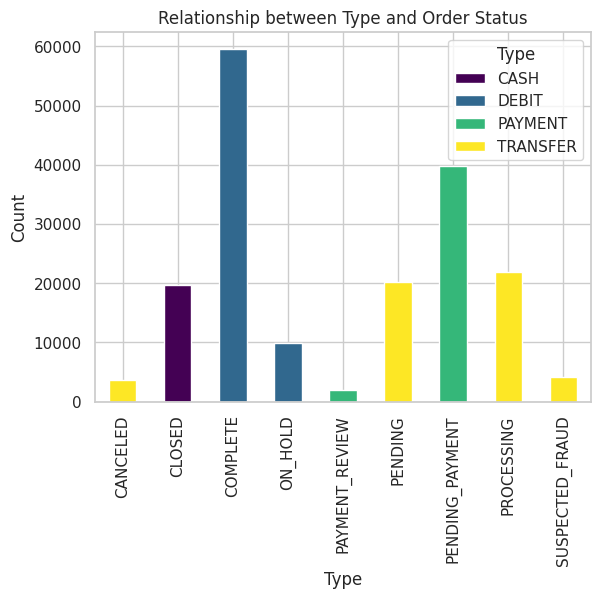

In [78]:
# Create a contingency table
contingency_table = pd.crosstab(df1['Order Status'], df1['Type'])

# Plot the stacked bar chart
sns.set(style="whitegrid")
contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Relationship between Type and Order Status')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

1.	Suspected Fraud, Pending, Processing and Cancelled payments are from Transfer mode of payments and therefor should be addressed, either by removing that payment method or only allowing trusted consumers to use that payment method
2.	Cash and Debit form of payments dominate the Complete and Closed orders and should be used as a preferred mode. Also, debit can be driven for improvements as most of them are of on-hold status due to payment issues.


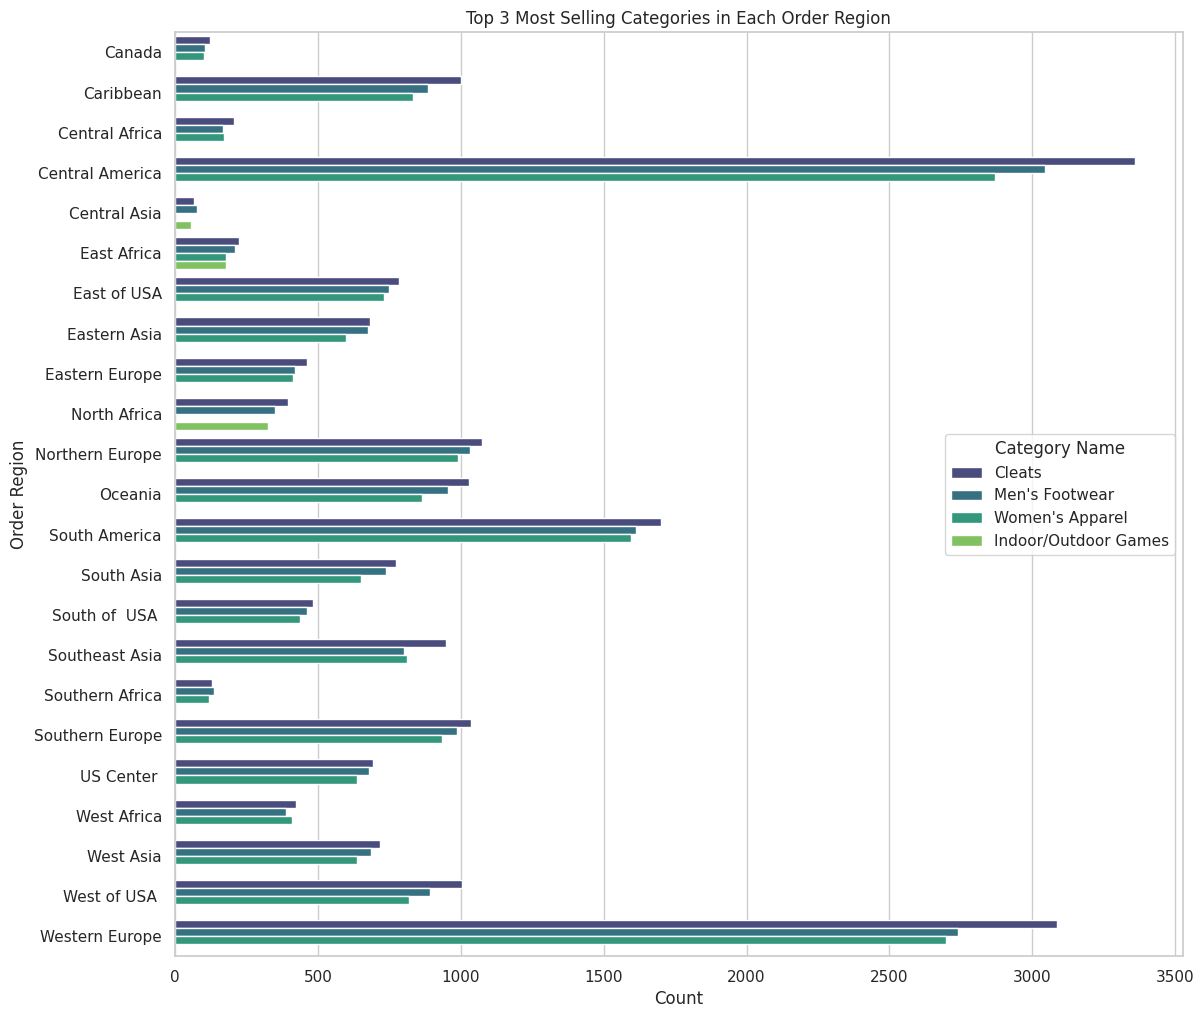

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(13, 12))
sns.barplot(x='Count', y='Order Region', hue='Category Name', data=top_3_categories,palette='viridis')
plt.xlabel('Count')
plt.ylabel('Order Region')
plt.title('Top 3 Most Selling Categories in Each Order Region')
plt.show()

Insight - Across all regions, it is observed that these 4 categories:
Cleats,
Men’s Footwear,
Women’s Apparel,
Indoor/Outdoor Games
are sold the most (quantity).

Among these, Cleats is the top seller in every region.

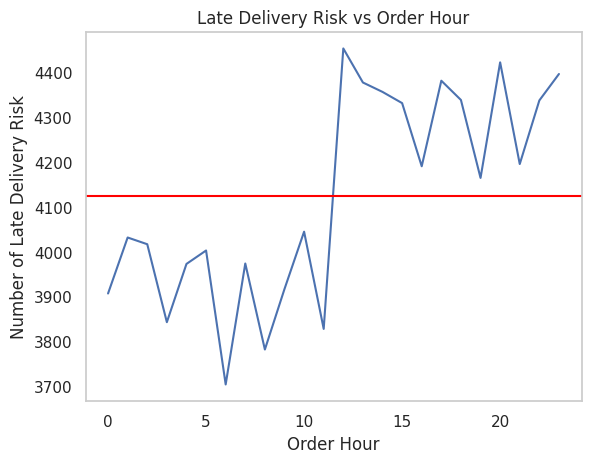

In [ ]:
df1['order date (DateOrders)'] = pd.to_datetime(df1['order date (DateOrders)'])
df1['Order Hour'] = df1['order date (DateOrders)'].dt.hour
df1.groupby(['Order Hour']).sum()['Late_delivery_risk'].plot()
plt.axhline(df1.groupby(['Order Hour']).sum()['Late_delivery_risk'].mean(), color='red')
plt.ylabel('Number of Late Delivery Risk')
plt.title('Late Delivery Risk vs Order Hour')
plt.grid()
plt.show()


**Actionable Insight**

We can clearly see that the number of orders having late delivery risk that are placed after 12 pm is significanty high. This could be due to

If orders placed after 12 pm are getting logged into the system the next day and subsequently shipped, it could indeed contribute to a higher late delivery risk for these orders. The delay in logging these orders into the system on the same day may impact their overall processing time.

To address this issue and potentially reduce the late delivery risk for orders placed after 12 pm, you might consider optimizing the order processing workflow. This could involve:

Optimizing Order Logging: If possible, streamline the process of logging orders into the system to ensure that orders placed after 12 pm are logged on the same day.

Adjusting Shipping Cut-Off Times: If feasible, consider adjusting the cut-off times for shipping. For example, you might set a shipping cut-off time that allows orders placed after 12 pm to be processed and shipped on the same day.

Improving Communication: Clearly communicate the expected delivery times to customers during the ordering process. This transparency can help manage customer expectations and reduce dissatisfaction related to late deliveries.

Order to shipment from stores time

In [ ]:
df1['ordtoship time']=(df1['shipping date (DateOrders)'] - df1['order date (DateOrders)']).dt.total_seconds() / 3600
df1['ordtoship time']=df1['ordtoship time'].astype('int')
df1['ordtoship time'].unique()

array([ 72, 120,  96,  48, 144,  12])

In [ ]:
def get_distance(x):
    if x < 3487:
        return "First Quartile"
    elif 3487 <= x < 7240:
        return "Second Quartile"
    elif 7240 <= x < 11129:
        return "Third Quartile"
    else:
        return "Fourth Quartile"

In [ ]:
df2['Get_distance']=df2['Distance'].apply(lambda x:get_distance(x))

In [ ]:
df2.groupby(['Get_distance']).mean()['Sales']

Get_distance
First Quartile     553.445934
Fourth Quartile    442.422412
Second Quartile    548.041718
Third Quartile     538.125378
Name: Sales, dtype: float64

In [ ]:
df2.groupby(['Get_distance']).mean()['Order Item Total']

Get_distance
First Quartile     537.667239
Fourth Quartile    424.373691
Second Quartile    528.561922
Third Quartile     519.927483
Name: Order Item Total, dtype: float64

In [ ]:
prob=[]
names=[]
for i in df1['Product Name'].value_counts().index:
    df_prod=df1[df1['Product Name']==i]
    vc=df_prod['Delivery Status'].value_counts()
    n=vc.index
    v=vc.values
    s=0
    names.append(i)
    for j,k in zip(n,v):
        if j in ['Late delivery','Shipping canceled']:
            s=s+k
    # print(f"{i} : {s/sum(v)}")
    prob.append(s/sum(v))
pr=pd.DataFrame()
pr['Product Name']=names
pr['Probability of Late Delivery/ Shipping Cancelled']=prob
pr=pr.sort_values(by=['Probability of Late Delivery/ Shipping Cancelled'],ascending=False)
top5 = pr.nlargest(5, 'Probability of Late Delivery/ Shipping Cancelled')
# Get the bottom 5 values
bottom5 = pr.nsmallest(5, 'Probability of Late Delivery/ Shipping Cancelled')
# Concatenate the two DataFrames
pr_new = pd.concat([top5, bottom5])
pr_new

,Product Name,Probability of Late Delivery/ Shipping Cancelled
115,Bushnell Pro X7 Jolt Slope Rangefinder,0.818182
117,SOLE E25 Elliptical,0.700000
96,Ogio Race Golf Shoes,0.688525
102,Titleist Small Wheeled Travel Cover,0.685185
28,Team Golf St. Louis Cardinals Putter Grip,0.680511
114,SOLE E35 Elliptical,0.400000
83,TaylorMade Women's RBZ SL Rescue,0.470588
112,Diamondback Girls' Clarity 24 Hybrid Bike 201,0.500000
100,Merrell Women's Grassbow Sport Waterproof Hik,0.500000
72,Merrell Men's All Out Flash Trail Running Sho,0.505882


Insights - We can see top products in these have the highest Probability % of getting delivered late or the shipping getting cancelled

Products with the Highest Total benefit per order.

In [ ]:
#Done
def most_frequent_status(series):
    try:
        return statistics.mode(series)
    except statistics.StatisticsError:
        return "Tie"  # Handle tie cases

#highest selling product
product_summary = df1.groupby('Product Name').agg({
    'Order Item Total': 'sum',
    'Benefit per order': 'sum',
    'Order Item Quantity': 'sum',
    'Order Item Discount Rate': 'mean',
    'Delivery Status': most_frequent_status
}).reset_index()

product_desc = product_summary.sort_values(by='Benefit per order', ascending=False)
product_desc[['Product Name','Order Item Quantity','Benefit per order']]

,Product Name,Order Item Quantity,Benefit per order
24,Field & Stream Sportsman 16 Gun Fire Safe,17325,756220.767190
71,Perfect Fitness Perfect Rip Deck,73698,493828.299782
21,Diamondback Women's Serene Classic Comfort Bi,13729,427455.568106
61,Nike Men's Free 5.0+ Running Shoe,36680,379915.818503
59,Nike Men's Dri-FIT Victory Golf Polo,62956,350421.029567
...,...,...,...
20,Diamondback Girls' Clarity 24 Hybrid Bike 201,28,284.420003
36,GoPro HERO3+ Black Edition Camera,32,245.630051
76,SOLE E25 Elliptical,10,-169.559997
9,Bushnell Pro X7 Jolt Slope Rangefinder,11,-255.950003


In [ ]:
df2.groupby(['Shipping Mode']).mean()['Order Item Total']

Shipping Mode
First Class       506.008046
Same Day          488.688196
Second Class      502.060002
Standard Class    503.213986
Name: Order Item Total, dtype: float64

Distribution of late deliveries across shipping modes

In [ ]:
df1[df1['Delivery Status']=="Late delivery"]['Shipping Mode'].value_counts()/df1['Shipping Mode'].value_counts()

Standard Class    0.380717
Second Class      0.766328
First Class       0.953225
Same Day          0.457430
Name: Shipping Mode, dtype: float64

Insight - We can clearly that the First class orders are getting 95% late which means the company is overcommiting on First class orders.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
##################LOGISTICS###################################
df1['shipping date (DateOrders)'] = pd.to_datetime(df1['shipping date (DateOrders)'])
df1['order date (DateOrders)'] = pd.to_datetime(df1['order date (DateOrders)'])
df1['ordtoship time']=(((df1['shipping date (DateOrders)'] - df1['order date (DateOrders)']).dt.total_seconds())/3600)
df1['ordtoship time']=df1['ordtoship time'].astype('int')

late_orders=df1[df1['Delivery Status']=='Late delivery'].groupby(['ordtoship time','Shipping Mode'])['Order Id'].nunique().reset_index(name='count')
total_orders=df1.groupby(['ordtoship time','Shipping Mode'])['Order Id'].nunique().reset_index(name='count')
unique_ordtoshiptime = df1['ordtoship time'].unique()
unique_ordtoshiptime

def ord_to_ship_hours(x):
    if x<=12:
        return 12
    elif x>12 and x<=48:
        return 48
    elif x>48 and x<=72:
        return 72
    elif x>72 and x<=96:
        return 96
    elif x>96 and x<=120:
        return 120
    else:
        return 144

df1['ordtoship time'] = df1['ordtoship time'].apply(ord_to_ship_hours)
unique_ordtoshiptime = df1['ordtoship time'].unique()
unique_ordtoshiptime

late_orders=df1[df1['Delivery Status']=='Late delivery'].groupby(['ordtoship time','Shipping Mode'])['Order Id'].nunique().reset_index(name='count')
total_orders=df1.groupby(['ordtoship time','Shipping Mode'])['Order Id'].nunique().reset_index(name='count')

fig = px.bar(total_orders, x='ordtoship time', y='count', color='Shipping Mode',
             title='Distribution of total orders for Order time to Shipping time hours')

# total_orders
fig.show()
# st.plotly_chart(fig, use_container_width=True, height=200)

In [ ]:
latedata = df1[df1['Delivery Status']=="Late delivery"]
median_latedata = latedata.groupby("Shipping Mode")['Days for shipping (real)'].median()
mean_latedata = latedata.groupby("Shipping Mode")['Days for shipping (real)'].mean()
# fig = px.bar(median_latedata, x=median_latedata.index, y=median_latedata.values, offset=0)
fig = make_subplots()

# Add Total Benefit to the chart
fig.add_trace(
    go.Bar(x=median_latedata.index, y=median_latedata.values, name="Median Late Data", offsetgroup=0)
)

# Add Total Benefit to the chart
fig.add_trace(
    go.Bar(x=mean_latedata.index, y=mean_latedata.values, name="Mean Late Data",offsetgroup=1)
)
# Show the plot
fig.show()


Total deliveries count for different order to shipment times for different shipping modes.

In [83]:
df5=df1[df1['Delivery Status']=='Late delivery'].groupby(['ordtoship time','Shipping Mode'])['Order Id'].nunique().reset_index(name='count')
df5

,ordtoship time,Shipping Mode,count
0,12,Same Day,1648
1,48,First Class,9602
2,72,Second Class,2422
3,96,Second Class,2473
4,120,Second Class,2452
5,120,Standard Class,7458
6,144,Second Class,2456
7,144,Standard Class,7537


Late deliveries count for different order to shipment times for different shipping modes.

In [84]:
df6=df1.groupby(['ordtoship time','Shipping Mode'])['Order Id'].nunique().reset_index(name='count')
df6

,ordtoship time,Shipping Mode,count
0,12,Same Day,3571
1,48,First Class,10079
2,48,Second Class,2565
3,48,Standard Class,7910
4,72,Second Class,2531
5,72,Standard Class,7877
6,96,Second Class,2565
7,96,Standard Class,7858
8,120,Second Class,2553
9,120,Standard Class,7783


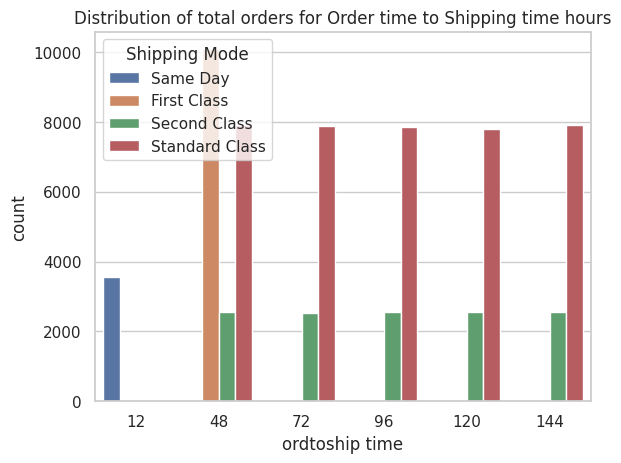

In [85]:
sns.barplot(x='ordtoship time',y='count',hue='Shipping Mode',data=df6)
plt.title('Distribution of total orders for Order time to Shipping time hours')
plt.show()

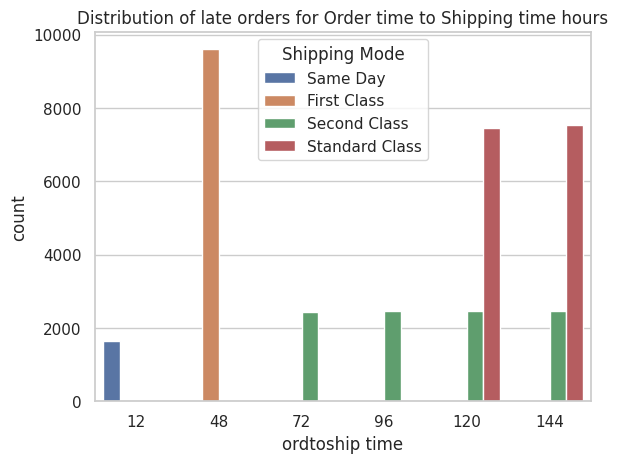

In [86]:
sns.barplot(x='ordtoship time',y='count',hue='Shipping Mode',data=df5)
plt.title('Distribution of late orders for Order time to Shipping time hours')
plt.show()

We found that:

All of the Standard Shipping mode orders which were shipped within or before 4 days of order, were delivered on time. Any order which took more than 4 days were mostly late.

All of the Second Class Orders which were shipped within or before 2 days were delivered on time. Any order which took more than 2 days were mostly late.

**Actionable Strategy to reduce late deliveries**:-

The company should push for shipping the standard class orders within or before 4 days from the time the order was placed so that the number of late deliveries will be almost to none and similarly for the second class orders, it should push for shipping the orders within or before 2 days.
